In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tools
import fitutils as ft
import scipy.optimize as opt

from data import temperature
from data import sample_HC
from data import err_sample_HC
from data import err_temperature

squared_temperature = temperature**2  # K**2
C_div_T = sample_HC/temperature  # mJ/K**2.mol
err_C_divT = err_sample_HC/temperature

In [3]:
# Constants 

k = 1.380649e-23
delta = 2.9461005*k*2.4
r = 8.31446261815324  # J/mol.K

In [22]:
def theorical_hc(T, beta, gamma, n) :
    phonon = beta*T
    x = delta/(k*T)
    schottky = n*r *((x/T)**2) * np.exp(x) / ((np.exp(x) + 1)**2)
    return phonon + gamma + schottky

def fit_func(T, beta, gamma, n):
    return theorical_hc(T, beta, gamma, n) / T  # mJ/K**2.mol / K = mJ/K**3.mol

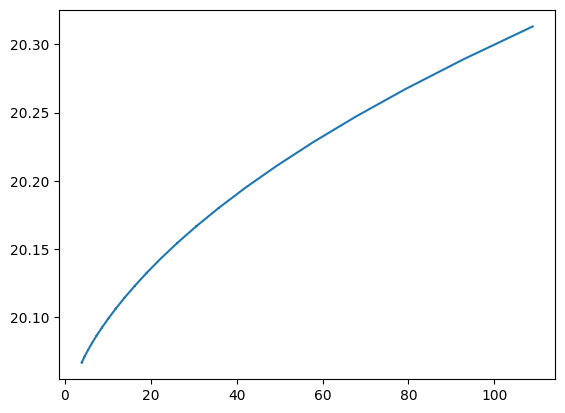

In [25]:
plt.figure()
#plt.plot(squared_temperature[0:65], C_div_T[0:65], 'yo', label='Experimental data')
plt.plot(squared_temperature[0:65], theorical_hc(temperature[0:65], 0.03, 20, 1e-2), label='Theoretical model')

In [26]:
# Optimization

res = opt.curve_fit(theorical_hc, squared_temperature[0:65], C_div_T[0:65],bounds=([1e-3,0, 1e-3], [1, 100, 1e-2]))

print(res)


(array([3.41946226e-01, 1.41646486e+01, 1.00000000e-02]), array([[ 1.10793255e-04, -4.15885947e-03,  2.71548113e-02],
       [-4.15885947e-03,  2.47736279e-01, -1.71404474e+00],
       [ 2.71548113e-02, -1.71404474e+00,  3.52145250e+01]]))


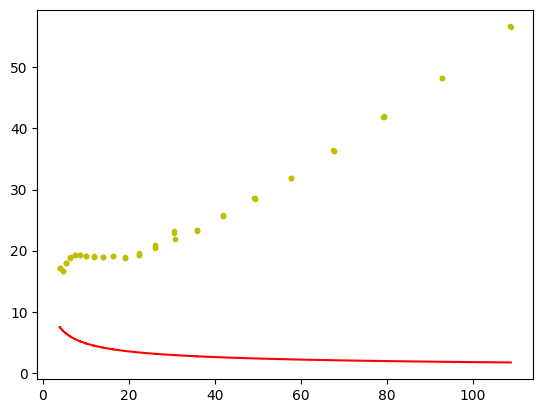

In [28]:
plt.figure()
plt.plot(squared_temperature[0:65], C_div_T[0:65], ".y", label="Data")
plt.plot(squared_temperature[0:65], fit_func(temperature[0:65], 3.41946226e-01, 1.41646486e+01, 1.00000000e-02), "r", label="Fit")